In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('C:/Users/SRJ/Downloads/marketprophecy-main/marketprophecy-main/BTC USD/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

In [3]:
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling

In [5]:
# Feature Scaling
# Use Normalization (versus Standardization) for RNNs with Sigmoid Activation Functions
# 'MinMaxScalar' is a Normalization Library
from sklearn.preprocessing import MinMaxScaler
# 'feature_range = (0,1)' makes sure that training data is scaled to have values between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [ ]:
# Creating a data structure with 60 timesteps (look back 60 days) and 1 output
# This tells the RNN what to remember (Number of timesteps) when predicting the next Stock Price
# The wrong number of timesteps can lead to Overfitting or bogus results
# 'x_train' Input with 60 previous days' stock prices
X_train = []
# 'y_train' Output with next day's stock price
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [6]:
# Reshaping (add more dimensions)
# This lets you add more indicators that may potentially have corelation with Stock Prices
# Keras RNNs expects an input shape (Batch Size, Timesteps, input_dim)
# '.shape[0]' is the number of Rows (Batch Size)
# '.shape[1]' is the number of Columns (timesteps)
# 'input_dim' is the number of factors that may affect stock prices
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Show the dataset we're working with
display(dataset_train)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...,...
2188,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2189,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299
2190,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018
2191,2021-12-31,47169.371094,48472.527344,45819.953125,46306.445313,46306.445313,36974172400


# Part 2 - Building the RNN

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
# Initialising the RNN
# Regression is when you predict a continuous value
regressor = Sequential()

In [9]:
# Adding the first LSTM layer and some Dropout regularisation
# 'units' is the number of LSTM Memory Cells (Neurons) for higher dimensionality
# 'return_sequences = True' because we will add more stacked LSTM Layers
# 'input_shape' of x_train
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 20% of Neurons will be ignored (10 out of 50 Neurons) to prevent Overfitting
regressor.add(Dropout(0.2))


In [11]:
# Adding a second LSTM layer and some Dropout regularisation
# Not need to specify input_shape for second Layer, it knows that we have 50 Neurons from the previous layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a fourth LSTM layer and some Dropout regularisation
# This is the last LSTM Layer. 'return_sequences = false' by default so we leave it out.
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:

# Adding the output layer
# 'units = 1' because Output layer has one dimension
regressor.add(Dense(units = 1))

In [15]:
# Compiling the RNN
# Keras documentation recommends 'RMSprop' as a good optimizer for RNNs
# Trial and error suggests that 'adam' optimizer is a good choice
# loss = 'mean_squared_error' which is good for Regression vs. 'Binary Cross Entropy' previously used for Classification
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [16]:
# Fitting the RNN to the Training set
# 'X_train' Independent variables
# 'y_train' Output Truths that we compare X_train to.
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 61ms/step - loss: 0.0013
Epoch 2/100
38/38 [==============================] - 2s 62ms/step - loss: 3.6979e-04
Epoch 3/100
38/38 [==============================] - 2s 64ms/step - loss: 3.3908e-04
Epoch 4/100
38/38 [==============================] - 2s 56ms/step - loss: 2.6396e-04
Epoch 5/100
38/38 [==============================] - 2s 56ms/step - loss: 2.6056e-04
Epoch 6/100
38/38 [==============================] - 2s 59ms/step - loss: 2.4398e-04
Epoch 7/100
38/38 [==============================] - 2s 57ms/step - loss: 2.2412e-04
Epoch 8/100
38/38 [==============================] - 2s 55ms/step - loss: 2.5510e-04
Epoch 9/100
38/38 [==============================] - 2s 57ms/step - loss: 2.6713e-04
Epoch 10/100
38/38 [==============================] - 2s 55ms/step - loss: 2.3864e-04
Epoch 11/100
38/38 [==============================] - 2s 58ms/step - loss: 2.0297e-04
Epoch 12/100
38/38 [==============================] - 2s 58ms/step 

# Making the predictions and visualising the results

In [17]:
# Getting the real stock price of 2022
dataset_test = pd.read_csv('C:/Users/SRJ/Downloads/marketprophecy-main/marketprophecy-main/BTC USD/BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
# Getting the predicted stock price of 2022
# We need 60 previous inputs for each day of the Test_set in 2022
# Combine 'dataset_train' and 'dataset_test'
# 'axis = 0' for Vertical Concatenation to add rows to the bottom
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# Extract Stock Prices for Test time period, plus 60 days previous
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# 'reshape' function to get it into a NumPy format
inputs = inputs.reshape(-1,1)
# Inputs need to be scaled to match the model trained on Scaled Feature
inputs = sc.transform(inputs)
# The following is pasted from above and modified for Testing, romove all 'Ys'
X_test = []

In [19]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [20]:
X_test = np.array(X_test)
# We need a 3D input so add another dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [22]:
# Predict the Stock Price
predicted_stock_price = regressor.predict(X_test)
# We need to inverse the scaling of our prediction to get a Dollar amount
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

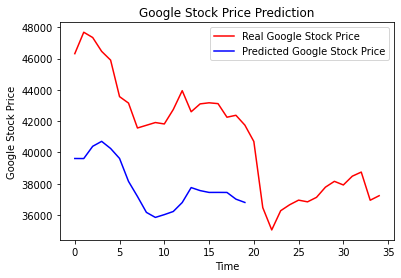

In [23]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
